In [258]:
# Importing the main libraries
import numpy as np
import pandas as pd

# Notebook settings
%matplotlib inline

# Importing data visualization libraries
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Data visualization settings
sns.set_style("whitegrid")

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [259]:
df = pd.read_csv('housing_in_london_monthly_variables.csv')

In [260]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [262]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [263]:
df['houses_sold'].fillna(df['houses_sold'].mean(), inplace = True)
df['no_of_crimes'].fillna(df['no_of_crimes'].mean(), inplace = True)
df['borough_flag'].fillna(0, inplace =True)

In [264]:
print(df['date'].min())
print(df['date'].max())

1995-01-01
2020-01-01


In [265]:
# Viewing the available areas in the dataset that aren't london boroughs
df[df['borough_flag'] == 0]['area'].unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [266]:
# Viewing the london boroughs
df[df['borough_flag'] == 1]['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

**Converting the date object to a datetime type**

In [267]:
df = df.set_index(pd.to_datetime(df['date']))
del df['date']

In [268]:
df.head()

,area,average_price,code,houses_sold,no_of_crimes,borough_flag
date,,,,,,
1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1
1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1
1995-03-01,city of london,79121,E09000001,14.0,2158.352063,1
1995-04-01,city of london,77101,E09000001,7.0,2158.352063,1
1995-05-01,city of london,84409,E09000001,10.0,2158.352063,1


**Number of houses sold in London over time**

In [269]:

houses_sold_london = df[df['area'] == 'london'] \
                       .groupby('date')['houses_sold'] \
                       .sum() \
                       .reset_index() \
                       .rename(columns={'date':'Date', 'houses_sold':'Houses Sold'})
houses_sold_london

,Date,Houses Sold
0,1995-01-01,7506.000000
1,1995-02-01,6873.000000
2,1995-03-01,9639.000000
3,1995-04-01,8053.000000
4,1995-05-01,9293.000000
...,...,...
296,2019-09-01,6903.000000
297,2019-10-01,7092.000000
298,2019-11-01,6707.000000
299,2019-12-01,3893.994129


**line plot for year 2010 - 2020**

In [270]:

fig = px.line(houses_sold_london[(houses_sold_london['Date'] >= '2000-01-01') & \
             (houses_sold_london['Date'] < '2020-01-01')],
              x="Date", y="Houses Sold",
              template='seaborn', title='Sold Houses in London')

fig

In [271]:
# Getting the avg for each decade and plotting in the graph
avg_first_decade = houses_sold_london[(houses_sold_london['Date'] >= '2000-01-01') & \
                                      (houses_sold_london['Date'] <= '2009-12-01')]['Houses Sold'] \
                                      .mean()

avg_first_decade = round(avg_first_decade, 0)

fig.add_shape( # add a horizontal line, representing the avg in the first decade
    type="line", line_color="coral", line_width=2, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=avg_first_decade,
    y1=avg_first_decade, yref="y"
)

fig.add_annotation( # add a text 
    text="2000-2009 average", x='2020-01-01', y=12000 
)

avg_second_decade = houses_sold_london[(houses_sold_london['Date'] >= '2010-01-01') & \
                                      (houses_sold_london['Date'] <= '2019-12-01')]['Houses Sold'] \
                                      .mean()

avg_second_decade = round(avg_second_decade, 0)

fig.add_shape( # add a horizontal line, representing the avg in the second decade
    type="line", line_color="darkcyan", line_width=2, opacity=1, line_dash="dash",
    x0=0, x1=1, xref="paper", y0=avg_second_decade,
    y1=avg_second_decade, yref="y",  
)

fig.add_annotation( # add a text 
    text="2010-2019 average", x='2020-01-01', y=8300 
)

# In order to represent the events, we can plot them in the graph below
fig.add_shape( # Shape representing the decrease
    type="rect",
    xref="x",
    yref="paper",
    x0="2007-08-01",
    y0=0,
    x1="2009-02-01",
    y1=1,
    fillcolor="lightpink",
    opacity=0.5,
    layer="below",
    line_width=0,
)

fig.add_shape( # Shape representing the surge
    type="rect",
    xref="x",
    yref="paper",
    x0="2016-02-01",
    y0=0,
    x1="2016-04-01",
    y1=1,
    fillcolor="lightgreen",
    opacity=0.5,
    layer="below",
    line_width=0
)


From this plot, the two things that most grabs our attention is the sharp decrease occured in the 2007-2008 period and the unusual surge that occured in March/2016. From a search on Google we can see that:

The Sharp decrease seen in the 2007-2008 period was due to the global financial crisis.
The surge in March/2016 occured because of a rush to beat an increase in the tax bill on buying a second home, that came into effect in April/2016.

**Average house price in england by region**

In [272]:
# First, let's create a new dataframe with the required information for the plot
avg_price_df = df[df['area'].isin(['south east', 'north east', 'north west',
                                    'yorks and the humber', 'east midlands', 
                                    'east of england', 'london', 'south west', 'west midlands'])] \
                            .filter(['date','area','average_price']) \
                            .rename(columns={'date':'Date','area':'Region','average_price':'Average Price'}) \
                            .sort_values(by='date')

avg_price_df

,Region,Average Price
date,,
1995-01-01,east of england,56702
1995-01-01,london,74436
1995-01-01,east midlands,45545
1995-01-01,west midlands,48528
1995-01-01,north west,43958
...,...,...
2020-01-01,east midlands,195707
2020-01-01,london,476588
2020-01-01,north east,126592


**Graph for average price trend of houses in different areas of london city **

In [273]:

prices_london_1 = df[df['borough_flag'] == 1].reset_index()
london_mean_price = prices_london_1.groupby('date')['average_price'].mean()

In [274]:
prices_london_1.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,1
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,1
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,1


In [275]:
fig = px.line(prices_london_1, x="date", y="average_price", color='area')

fig.update_layout(
    template='gridon',
    title='Average Monthly London House Price by Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)



**10 most expensive areas in london**

In [276]:
expensive = prices_london_1.groupby('area')['average_price'].mean()
exp_top10 = expensive.sort_values(ascending = False).to_frame()

print ('\nThe 10 most expensive boroughs in London are:')
exp_top10.head(10)


The 10 most expensive boroughs in London are:


,average_price
area,
kensington and chelsea,742060.368771
westminster,543865.936877
camden,467500.910299
hammersmith and fulham,443791.860465
city of london,423942.584718
richmond upon thames,382615.960133
islington,365187.717608
wandsworth,342304.199336
barnet,304991.089701


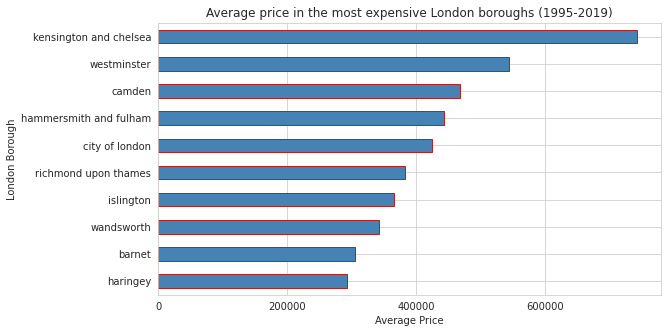

In [277]:
exp_top10.head(10).sort_values(by = 'average_price', ascending = True).plot(kind = 'barh', figsize = (9, 5), 
                                                                               color = 'steelblue', edgecolor = 'firebrick',
                                                                               legend = False)

plt.title('Average price in the most expensive London boroughs (1995-2019)')
plt.ylabel('London Borough')
plt.xlabel('Average Price')
plt.xticks([0, 200_000, 400_000, 600_000]);

Kensington and Chelsea is the most expensive borough in London between 1995 and 2019. We can read in wikipedia that it holds royal status and it includes many affluent areas, hence the increased price.
Westminister, which is adjacent to Kensighton, comes second. Again this is not a surpise since it is the location of the national government and includes many sites commonly associated with London (e.g. the Buckingham Palace, the Houses of Parliament, 10 Downing Street, and Trafalgar Square) (Source).

**Plot for borough 0**

In [278]:
prices_england = df[df['borough_flag'] == 0].reset_index()
fig2 = px.line(prices_england, x="date", y="average_price", color='area')

fig2.update_layout(
    template='gridon',
    title='Average Monthly London House Price by Borough',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)



**Plotting graph for inner london and outer london**

In [279]:
df2=df.reset_index()


In [280]:
inner_outer_df = df2[(df2['area'].isin(['inner london','outer london'])) & (df2['date'].dt.year >= 2000) & (df2['date'].dt.year <= 2019)] \
                   .groupby(['date','area'])['houses_sold','average_price'] \
                   .agg({'houses_sold':'sum','average_price':'mean'}) \
                   .reset_index() \
                   .rename(columns={'date':'Date','area':'Area','houses_sold':'Houses Sold','average_price':'Average Price'}) \
                   .melt(id_vars=['Date','Area'])

fig = px.line(inner_outer_df, x='Date', y='value', color='Area', facet_row='variable',
              title = 'Sold Houses and Average Price - Inner and Outer London')

fig.update_yaxes(matches=None) # Allows the y axes on both facets to be independent from each other

In [281]:
prices_london_2 = df[df['borough_flag'] == 1]
# Calculate the mean yearly price per borough
yearly_prices_london = prices_london_2.groupby('area').resample('y')['average_price'].mean() 


# Calculate the yealy average price percentage change
yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: x.pct_change())

yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.unstack()
yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.iloc[::-1]

del yearly_prices_london_pct_ch['1995-12-31']

In [282]:
fig = go.Figure(data=go.Heatmap(
        z=yearly_prices_london_pct_ch.values,
        x=yearly_prices_london_pct_ch.columns,
        y=yearly_prices_london_pct_ch.index,
        colorscale='Cividis'))

fig.update_layout(
    title='YoY Average London House Price Percentage Change',
    title_x=0.5,
    yaxis_nticks=33,
    xaxis_title='Year',
    yaxis_title='Borough'
)

fig.show()

A heatmap provides an interesting way to analyze the changes in house prices. The year 2000 has seen the sharpest house price rise. The mid '10 have also seen the prices trending upwards, but they have been relatively stable / decreasing since.

In [283]:
import geopandas as gpd

In [284]:

# Load the shape file for mapping
map_df = gpd.read_file('London_Borough_Excluding_MHW.shp')

map_df = map_df[['NAME', 'geometry']]
map_df = map_df.rename(columns={'NAME': 'area'})
map_df['area'] = map_df['area'].str.lower()
map_df['area'] = map_df['area'].str.replace('&','and')

yearly_prices_london_df_map = pd.DataFrame(yearly_prices_london)
yearly_prices_london_df_map = yearly_prices_london_df_map.reset_index()

price_map = map_df.set_index('area').join(yearly_prices_london_df_map.set_index('area'))
price_map = price_map.reset_index()

price_map = price_map[price_map['date'] == '2019-12-31']


INFO:fiona.ogrext:Failed to auto identify EPSG: 7


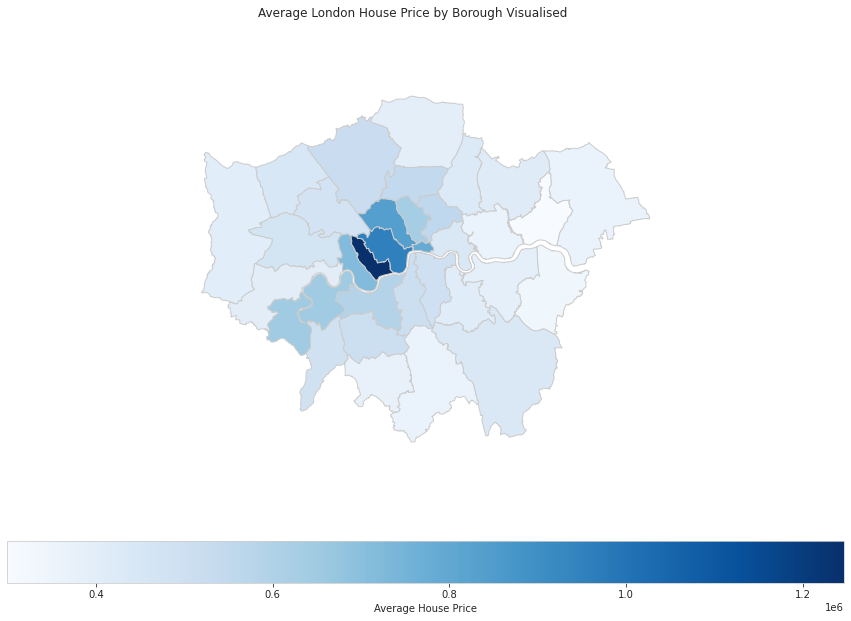

In [285]:
variable = 'average_price'

fig, ax = plt.subplots(1, figsize=(15, 10))
price_map.plot(column=variable, 
               cmap='Blues', 
               linewidth=1, 
               ax=ax, 
               edgecolor='0.8', 
               legend=True,
               legend_kwds={'label': "Average House Price",
                           'orientation': "horizontal"})
ax.axis('off')
plt.suptitle('Average London House Price by Borough Visualised')
plt.show()

The map nicely illustrates that West London and central tends to be a much more expensive place to live than East London.



**Prophet model**
for prediction

Prophet is an open source forcasting tool developed by Facebook Core Data Science team. It is available in Python and R. Facebook's team pitches Prophet as: fast, accurate, robust to outliers and intuitively tunable.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


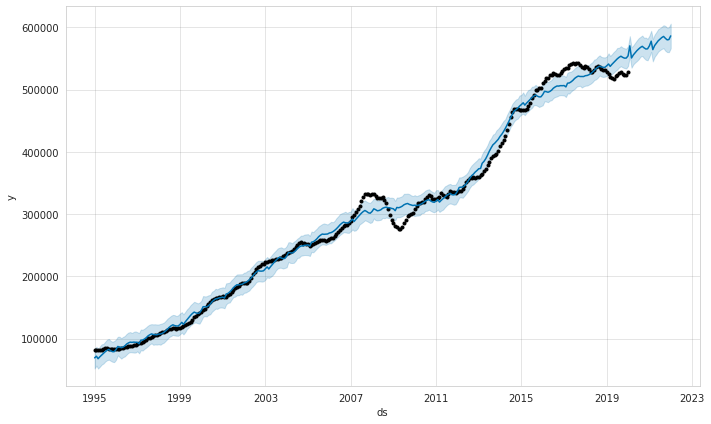

In [286]:
from fbprophet import Prophet
# Prepare the 
model_df = pd.DataFrame(london_mean_price).reset_index()
model_df = model_df.rename(columns={'date': 'ds', 'average_price': 'y'})

# Initialise the model and make predictions
m = Prophet()
m.fit(model_df)

future = m.make_future_dataframe(periods=24, freq='M')

forecast = m.predict(future)

# Visualise the prediction
fig1 = m.plot(forecast)
